## Data import, cleaning and pre-processing

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('data_05-09-2020.csv', sep=',', encoding="ISO-8859-1")

The dataset contains Montreal and Toronto based positions collected manually on Indeed.ca on Sep 5, 2020 using 'data scientist' as a search keyword. To obtain salary estimates, in addition to this keyword, I used several filters for annual salary. When a filter is used, the search returns positions with the estimated salary equalling **at least** the specified amount. 

Level 'All' in salary means all data scientist positions, whether having estimated salary information or not. 
A filter for 60K will return positions for 60K, 70K, 80K, 90K and so on. A filter for 70K will return positions for 70K, 80K, 90K and so on. That means that the same position, depending on its salary, can appear in response to several filters applied on Indeed.ca. As I did not remove duplicates while collecting data, I will do this now.

The below code will first reshape the data from long to wide format (using 'unstack' command) and then remove the duplicate positions, keeping only results from the filter with the highest salary level for a given position (the last occurrence of the same position in the data set).

After these transformations, positions with salary not available will still have 'All' in the Salary field (this should be  read as NA).

In [2]:
df = df.set_index(['ID', 'Salary','Field'])
df

Posting  \
ID  Salary Field                                                             
1   All    Position                                   Data Scientist, Game   
           Company                                       Prodigy Game 4.9    
           Location                                            Toronto, ON   
           Remote                                       Temporarily remote   
           Description1     At least 2 years of data analytics experience.   
...                                                                    ...   
945 120K   Company                                                  kpmgca   
           Location                                           Montréal, QC   
           Description1      Perform quantitative analysis of data issues.   
           Description2  Industry thought leadership on relevant topics...   
           Days ago                                                     21   

                             City  
ID  Salary Field                   
1   All    Position       Toronto  
           Company        Toronto  
           Location       Toronto  
           Remote         Toronto  
           Description1   Toronto  
...                           ...  
945 120K   Company       Montreal  
           Location      Montreal  
           Description1  Montreal  
           Description2  Montreal  
           Days ago      Montreal  

[5745 rows x 2 columns]

In [3]:
df1 = df.unstack()
df1

Posting           \
Field                            Company Days ago   
ID  Salary                                          
1   All                Prodigy Game 4.9        30   
2   All                  Dean Group 3.1        18   
3   All                 Robert Half 3.9        30   
4   All                    Coursera 4.3         3   
5   All           Beauty Matching Engine       30   
...                                  ...      ...   
941 110K                          kpmgca       21   
942 110K    National Bank of Canada 3.9        30   
943 110K                   Overbond 3.3        30   
944 120K                     Nuance 3.2        30   
945 120K                          kpmgca       21   

                                                               \
Field                                            Description1   
ID  Salary                                                      
1   All        At least 2 years of data analytics experience.   
2   All     Perform ETL with massive data from multiple ap...   
3   All     Ensure all processes preserve data integrity b...   
4   All     Strong applied statistics and data visualizati...   
5   All     This is a 3-6 month full-time data scientist c...   
...                                                       ...   
941 110K        Perform quantitative analysis of data issues.   
942 110K    Create a strategic roadmap (data, ideas, analy...   
943 110K    Lead data science initiatives to recommend act...   
944 120K    The ideal candidate is a thought leader, with ...   
945 120K        Perform quantitative analysis of data issues.   

                                                               \
Field                                            Description2   
ID  Salary                                                      
1   All     Ability to translate data insights into action...   
2   All     Knowledge in advanced data structures and can ...   
3   All                                                   NaN   
4   All     Experience working with Salesforce and/or Mark...   
5   All                                                   NaN   
...                                                       ...   
941 110K    Industry thought leadership on relevant topics...   
942 110K    Stay up to date on trends and news in the fiel...   
943 110K                                                  NaN   
944 120K                                                  NaN   
945 120K    Industry thought leadership on relevant topics...   

                                                               \
Field                                            Description3   
ID  Salary                                                      
1   All     Experience in cloud ecosystems and their data ...   
2   All                                                   NaN   
3   All                                                   NaN   
4   All               Check out life at Coursera on The Muse!   
5   All                                                   NaN   
...                                                       ...   
941 110K                                                  NaN   
942 110K                                                  NaN   
943 110K                                                  NaN   
944 120K                                                  NaN   
945 120K                                                  NaN   

                                                            \
Field                   Easily apply              Location   
ID  Salary                                                   
1   All                          NaN           Toronto, ON   
2   All     Easily apply to this job           Toronto, ON   
3   All     Easily apply to this job           Toronto, ON   
4   All                          NaN  Toronto, ON - Remote   
5   All     Easily apply to this job  Toronto, ON - Remote   
...                              ...                   ...   

In [4]:
df1.index

MultiIndex([(  1,  'All'),
            (  2,  'All'),
            (  3,  'All'),
            (  4,  'All'),
            (  5,  'All'),
            (  6,  'All'),
            (  7,  'All'),
            (  8,  'All'),
            (  9,  'All'),
            ( 10,  'All'),
            ...
            (936, '100K'),
            (937, '100K'),
            (938, '100K'),
            (939, '100K'),
            (940, '110K'),
            (941, '110K'),
            (942, '110K'),
            (943, '110K'),
            (944, '120K'),
            (945, '120K')],
           names=['ID', 'Salary'], length=945)

In [5]:
# because we had a column for city, unstack did not work ideally...
df1.columns

MultiIndex([('Posting',      'Company'),
            ('Posting',     'Days ago'),
            ('Posting', 'Description1'),
            ('Posting', 'Description2'),
            ('Posting', 'Description3'),
            ('Posting', 'Easily apply'),
            ('Posting',     'Location'),
            ('Posting',     'Position'),
            ('Posting',       'Remote'),
            ('Posting', 'Salary_shown'),
            (   'City',      'Company'),
            (   'City',     'Days ago'),
            (   'City', 'Description1'),
            (   'City', 'Description2'),
            (   'City', 'Description3'),
            (   'City', 'Easily apply'),
            (   'City',     'Location'),
            (   'City',     'Position'),
            (   'City',       'Remote'),
            (   'City', 'Salary_shown')],
           names=[None, 'Field'])

In [6]:
# remove extra columns that appeared when City multiplied...
df1 = df1.iloc[:,:11]

In [7]:
df1.columns

MultiIndex([('Posting',      'Company'),
            ('Posting',     'Days ago'),
            ('Posting', 'Description1'),
            ('Posting', 'Description2'),
            ('Posting', 'Description3'),
            ('Posting', 'Easily apply'),
            ('Posting',     'Location'),
            ('Posting',     'Position'),
            ('Posting',       'Remote'),
            ('Posting', 'Salary_shown'),
            (   'City',      'Company')],
           names=[None, 'Field'])

In [8]:
df1[:5]

Posting           \
Field                     Company Days ago   
ID Salary                                    
1  All          Prodigy Game 4.9        30   
2  All            Dean Group 3.1        18   
3  All           Robert Half 3.9        30   
4  All              Coursera 4.3         3   
5  All     Beauty Matching Engine       30   

                                                              \
Field                                           Description1   
ID Salary                                                      
1  All        At least 2 years of data analytics experience.   
2  All     Perform ETL with massive data from multiple ap...   
3  All     Ensure all processes preserve data integrity b...   
4  All     Strong applied statistics and data visualizati...   
5  All     This is a 3-6 month full-time data scientist c...   

                                                              \
Field                                           Description2   
ID Salary                                                      
1  All     Ability to translate data insights into action...   
2  All     Knowledge in advanced data structures and can ...   
3  All                                                   NaN   
4  All     Experience working with Salesforce and/or Mark...   
5  All                                                   NaN   

                                                              \
Field                                           Description3   
ID Salary                                                      
1  All     Experience in cloud ecosystems and their data ...   
2  All                                                   NaN   
3  All                                                   NaN   
4  All               Check out life at Coursera on The Muse!   
5  All                                                   NaN   

                                                           \
Field                  Easily apply              Location   
ID Salary                                                   
1  All                          NaN           Toronto, ON   
2  All     Easily apply to this job           Toronto, ON   
3  All     Easily apply to this job           Toronto, ON   
4  All                          NaN  Toronto, ON - Remote   
5  All     Easily apply to this job  Toronto, ON - Remote   

                                                                     \
Field                                  Position              Remote   
ID Salary                                                             
1  All                     Data Scientist, Game  Temporarily remote   
2  All                Machine Learning Engineer                 NaN   
3  All                           Data Scientist                 NaN   
4  All     Senior Data Scientist, Enterprisenew                 NaN   
5  All                           Data Scientist                 NaN   

                                         City  
Field                   Salary_shown  Company  
ID Salary                                      
1  All                           NaN  Toronto  
2  All                           NaN  Toronto  
3  All     $95,000 - $105,000 a year  Toronto  
4  All                           NaN  Toronto  
5  All     $64,136 - $140,055 a year  Toronto

In [9]:
# drop one level from columns
df1.columns = df1.columns.droplevel()

In [10]:
df1.drop('Easily apply', axis=1, inplace=True)

C:\Users\milla\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
df2 = df1.drop_duplicates(keep='last') # keep only the last occurrence of a given position.
df2.shape

(253, 10)

In [12]:
df2.count()

Field
Company         253
Days ago        253
Description1    253
Description2    136
Description3     19
Location        253
Position        253
Remote            2
Salary_shown     16
Company         253
dtype: int64

In [13]:
df2.columns # we have multi-level index in columns.

Index(['Company', 'Days ago', 'Description1', 'Description2', 'Description3',
       'Location', 'Position', 'Remote', 'Salary_shown', 'Company'],
      dtype='object', name='Field')

In [14]:
df2.columns # no more multi-level indexing

Index(['Company', 'Days ago', 'Description1', 'Description2', 'Description3',
       'Location', 'Position', 'Remote', 'Salary_shown', 'Company'],
      dtype='object', name='Field')

In [15]:
df2.columns = ['Company', 'Days ago', 'Description1', 'Description2', 'Description3',
       'Location', 'Position', 'Remote', 'Salary_shown',
       'City']

In [16]:
df2.Salary_shown.value_counts() 

$80,000 a year                2
$77,897 - $95,207 a year      1
$60 - $75 an hour             1
$120,000 - $160,000 a year    1
$95,000 - $105,000 a year     1
$30,000 a year                1
$28.44 an hour                1
$35 - $78 an hour             1
$64,136 - $140,055 a year     1
$50,000 - $95,000 a year      1
$60,934 - $76,000 a year      1
$100,000 a year               1
$80,000 - $120,000 a year     1
$60,000 - $75,000 a year      1
$100,000 - $120,000 a year    1
Name: Salary_shown, dtype: int64

In [17]:
# check whether estimated salary is close to the shown in the posting (in most cases, yes)
df2[df2.Salary_shown.notnull()]

,,Company,Days ago,Description1,Description2,Description3,Location,Position,Remote,Salary_shown,City
ID,Salary,,,,,,,,,,
24,All,SalesGrowth Development Inc.,23,"Experience in data processing automation, cura...",Discovering and preparing data to be leveraged...,NaN,"Concord, ON",Data Scientist,NaN,"$30,000 a year",Toronto
161,60K,University Health Network 4.2,4,Conduct data quality investigations and engage...,Strong data visualization and presentation ski...,NaN,"Toronto, ON",Data Analystnew,NaN,"$60,934 - $76,000 a year",Toronto
174,60K,16 Bit Inc.,28,Experience applying machine learning to health...,"Create, extend, and maintain large databases o...",Fluent in the Python programming language.,"Toronto, ON - Remote",Data Scientist,NaN,"$60,000 - $75,000 a year",Toronto
337,70K,Crescendo 3.1,9,Proven working experience in a data science re...,Data science related: 1 year (Preferred).,We are looking for a Business Intelligence Ana...,"Toronto, ON - Temporarily remote",Post 5071: Business Intelligence Analyst,NaN,"$50,000 - $95,000 a year",Toronto
452,80K,TKEES Inc,9,Data analytics : 4 years (Preferred).,We are interested in furthering our data colle...,NaN,"Toronto, ON - Temporarily remote",Sr. Data Analyst,NaN,"$77,897 - $95,207 a year",Toronto
628,100K,Robert Half 3.9,30,Ensure all processes preserve data integrity b...,NaN,NaN,"Toronto, ON",Data Scientist,NaN,"$95,000 - $105,000 a year",Toronto
629,100K,Staffinity Inc. 4.5,30,Evaluating state-of-the-art statistical modeli...,We offer competitive salaries and great bonuse...,NaN,"Toronto, ON",Data Scientist/Machine Learning Engineer,NaN,"$80,000 - $120,000 a year",Toronto
631,100K,Beauty Matching Engine,30,This is a 3-6 month full-time data scientist c...,NaN,NaN,"Toronto, ON - Remote",Data Scientist,NaN,"$64,136 - $140,055 a year",Toronto
676,110K,FutureFit AI,16,Experienced with the full data stack - data an...,Automate the data update and monitoring process.,NaN,"Toronto, ON - Remote",Head of Data Science,NaN,"$100,000 - $120,000 a year",Toronto


In [18]:
df2.to_csv('data_reshaped-05-09-2020.csv')

In [19]:
df3 = df2.reset_index()

In [20]:
df3['Days ago'] = df3['Days ago'].astype('int64')
df3.dtypes

ID               int64
Salary          object
Company         object
Days ago         int64
Description1    object
Description2    object
Description3    object
Location        object
Position        object
Remote          object
Salary_shown    object
City            object
dtype: object

## Data exploration

### Quick-and-dirty exploration

Now we can explore our data. Let's look which companies have open positions and when they were published on Indeed.ca. I did not pre-clean company names from numbers - they show the average number of stars employees gave to a company, whenever available. As this is another piece of information, I'll keep it for now.

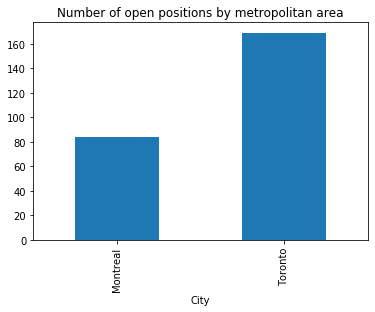

In [21]:
df3.groupby('City')['ID'].count().plot(kind='bar', title = 'Number of open positions by metropolitan area')
plt.show()

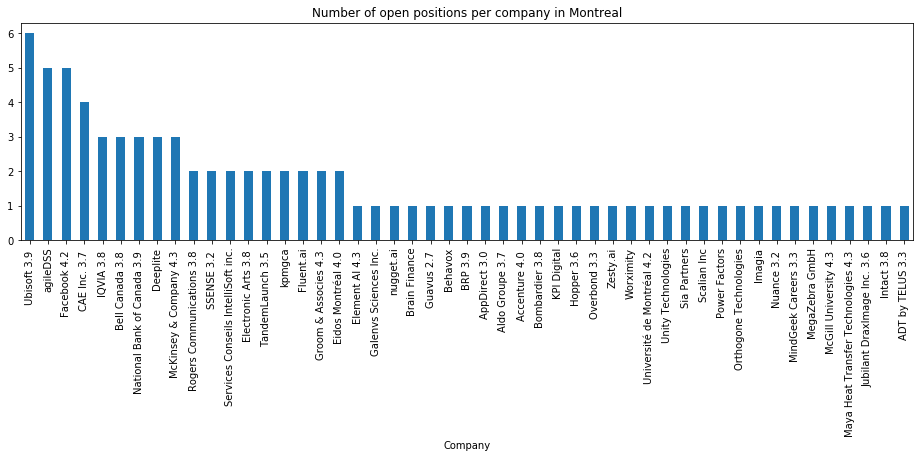

In [22]:
MTL_comp = df3[df3.City=="Montreal"].groupby('Company')['ID'].count().sort_values(ascending=False)
MTL_comp.plot(kind='bar', figsize=(16,4), title = 'Number of open positions per company in Montreal')
plt.show()

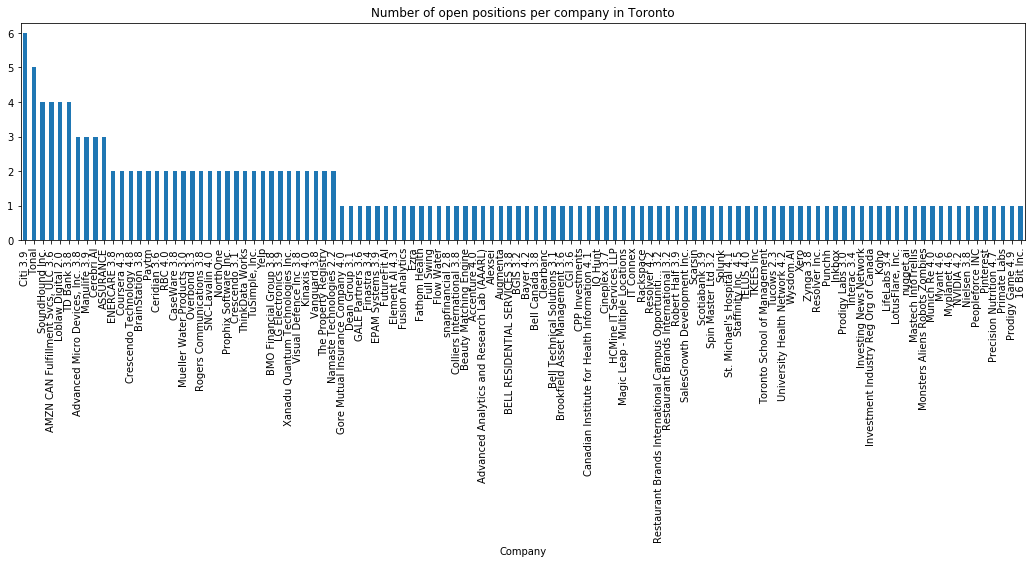

In [23]:
TOR_comp = df3[df3.City=="Toronto"].groupby('Company')['ID'].count().sort_values(ascending=False)
TOR_comp.plot(kind='bar', figsize=(18,4), title = 'Number of open positions per company in Toronto')
plt.show()

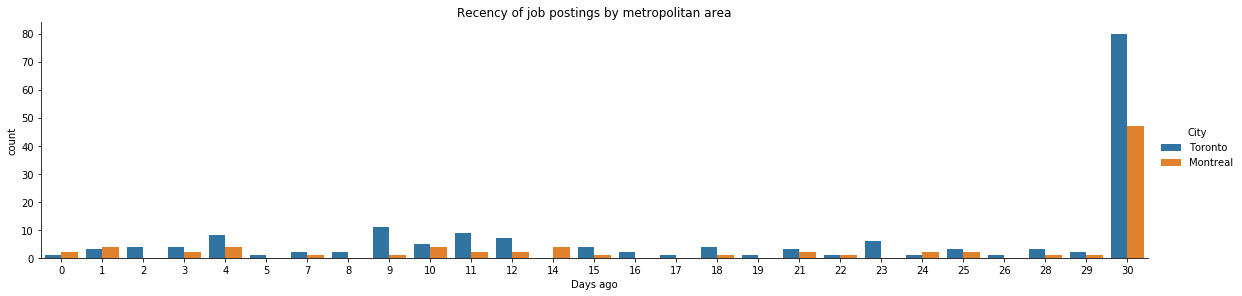

In [24]:
sns.catplot(x='Days ago', kind='count', hue='City', data=df3, height=4, aspect=4)
plt.title('Recency of job postings by metropolitan area')
plt.show()

The below plot shows that most positions appeared on Indeed more than 30 days ago.

Let's look at the salary distribution.

In [25]:
salary_all = df3.groupby(['Salary'])['ID'].count().to_frame()
salary_all

,ID
Salary,
100K,33
110K,15
120K,9
60K,18
70K,29
80K,53
90K,51
All,45


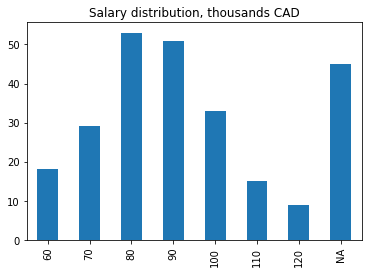

In [26]:
salary_all.index = [100,110,120,60,70,80,90,'NA']
new_order = [60,70,80,90,100,110,120,'NA']
salary_all.reindex(new_order).plot(kind='bar', legend=False, title = 'Salary distribution, thousands CAD')
plt.show()

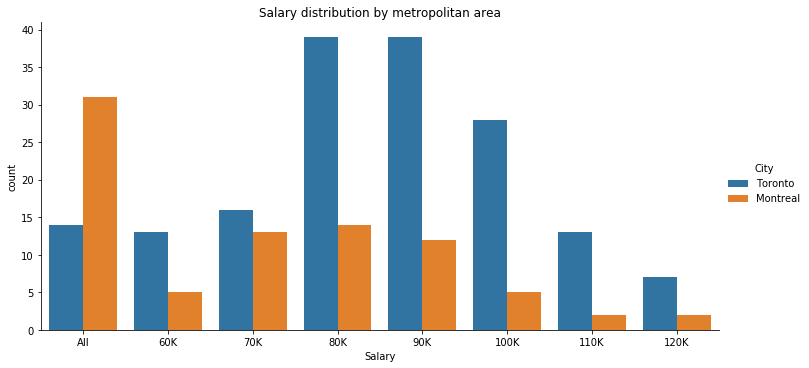

In [27]:
sns.catplot(x='Salary', kind='count', hue='City', data=df3, aspect=2)
plt.title('Salary distribution by metropolitan area')
plt.show()

Let's organize the salary data a bit and put it on a plot. Among the positions for which we have estimated salary information, 70-80K are the most frequent values.

### Exploring recent positions

What about positions that appeared recently - within the last 15 days? It turns out that only 88/253 positions in our data set appeared recently, and even among those some are 'recycled' as I saw them a earlier.

In [28]:
# calculate the number of positions that appeared recently - by city
df3[df3['Days ago']<=15].groupby('City')['ID'].count()

City
Montreal    27
Toronto     61
Name: ID, dtype: int64

In [29]:
df3[df3['Days ago']<=15].groupby('Salary')['ID'].count().to_frame()

,ID
Salary,
100K,11
110K,3
120K,5
60K,5
70K,8
80K,20
90K,20
All,16


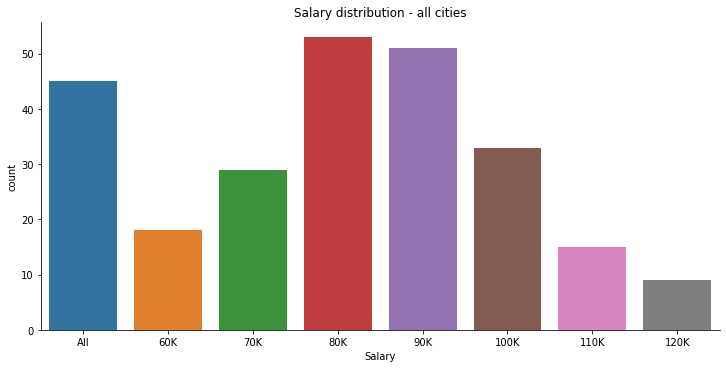

In [30]:
sns.catplot(x='Salary', kind='count', data=df3, aspect=2)
plt.title('Salary distribution - all cities')
plt.show()

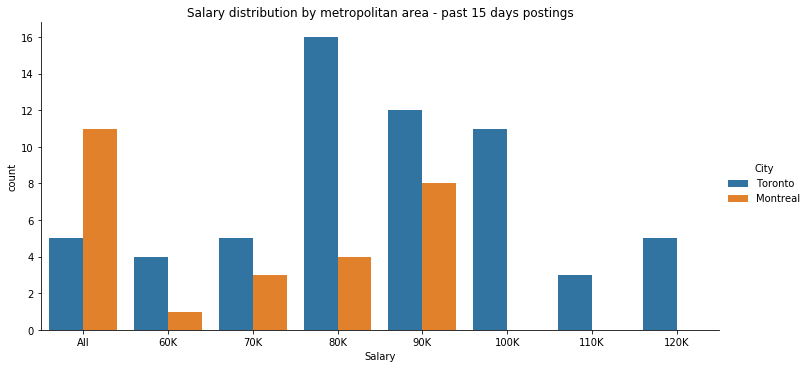

In [31]:
sns.catplot(x='Salary', kind='count', hue='City', data=df3[df3['Days ago']<=15], aspect=2)
plt.title('Salary distribution by metropolitan area - past 15 days postings')
plt.show()

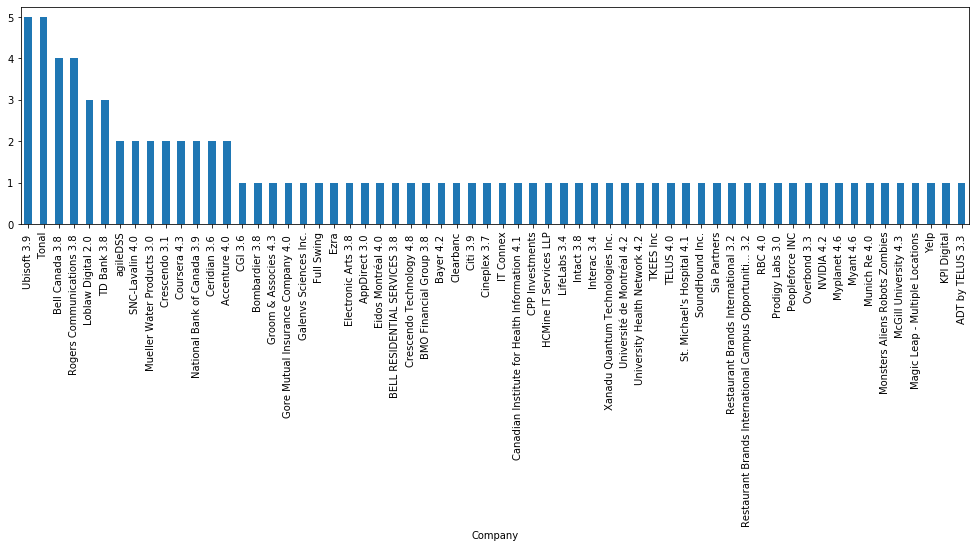

In [32]:
df3[df3['Days ago']<=15].groupby('Company')['ID'].count().sort_values(ascending=False).plot(kind='bar', figsize=(17,4))
plt.show()

### Exploring positions offered by some companies

In [33]:
df3[df3.Company.str.contains('Bell')]

,ID,Salary,Company,Days ago,Description1,Description2,Description3,Location,Position,Remote,Salary_shown,City
117,617,90K,Bell Technical Solutions 3.1,30,Support the Excellence Center reporting team i...,NaN,NaN,"Mississauga, ON","Sr. Developer, Business Intelligence",NaN,NaN,Toronto
131,641,100K,Bell Canada 3.8,11,Big data is a big deal.,"Experience with the design, development and ma...",NaN,"Toronto, ON",ON - 2021 Customer Operations Graduate Leaders...,NaN,NaN,Toronto
182,737,All,Bell Canada 3.8,11,"Req Id: 262711 At Bell, we do more than build ...",NaN,NaN,"Montréal, QC",QC - 2021 Customer Operations Graduate Leaders...,NaN,NaN,Montreal
225,893,80K,Bell Canada 3.8,11,Big data is a big deal.,"Experience with the design, development and ma...",NaN,"Montréal, QC",QC - 2021 Customer Operations Graduate Leaders...,NaN,NaN,Montreal
239,920,90K,Bell Canada 3.8,12,Big data is a big deal.,"Experience with the design, development and ma...",NaN,"Montréal, QC",QC - 2021 Customer Operations Graduate Leaders...,NaN,NaN,Montreal


In [34]:
df3[df3.Company.str.contains('CAE')]

,ID,Salary,Company,Days ago,Description1,Description2,Description3,Location,Position,Remote,Salary_shown,City
170,708,All,CAE Inc. 3.7,30,Assess the effectiveness and accuracy of new d...,Experience working with and creating data arch...,NaN,"Saint-Laurent, QC",Scientifique des données / Data Scientist,NaN,NaN,Montreal
175,727,All,CAE Inc. 3.7,30,Experience in data warehouse design and implem...,Develop data management tools to support data-...,NaN,"Saint-Laurent, QC",Analyste des données / Data Analyst,NaN,NaN,Montreal
193,757,All,CAE Inc. 3.7,30,"Understanding of data structures, data modelin...",You will bridge the gap between the academic w...,NaN,"Saint-Laurent, QC",Ingénieur.e en apprentissage machine / Machine...,NaN,NaN,Montreal
195,770,All,CAE Inc. 3.7,30,Discuss with the development and architecture ...,NaN,NaN,"Saint-Laurent, QC","Directeur.trice, intelligence articielle / Dir...",NaN,NaN,Montreal


In [35]:
df3[df3.Company.str.contains('Ubisoft')]

,ID,Salary,Company,Days ago,Description1,Description2,Description3,Location,Position,Remote,Salary_shown,City
183,738,All,Ubisoft 3.9,10,Company Description null Job Description At Ub...,NaN,NaN,"Montréal, QC",Data Science Team Lead (User Research Lab),NaN,NaN,Montreal
188,743,All,Ubisoft 3.9,14,Company Description null Job Description Le Gr...,NaN,NaN,"Montréal, QC","Programmeuse, Programmeur Machine Learning (Gr...",NaN,NaN,Montreal
223,891,80K,Ubisoft 3.9,10,Participate in recruitment to build your team ...,Develop and enhance the use of data.,NaN,"Montréal, QC",Data Science Team Lead (User Research Lab),NaN,NaN,Montreal
227,898,80K,Ubisoft 3.9,14,Follow the progress of prototypes by research ...,"Your technical expertise, paired with your com...",NaN,"Montréal, QC",Machine Learning Programmer (Technology Group),NaN,NaN,Montreal
237,918,90K,Ubisoft 3.9,14,Ubisoft Enterprise Data is responsible for pro...,NaN,NaN,"Montréal, QC",Data Scientist,NaN,NaN,Montreal
242,924,90K,Ubisoft 3.9,28,Develop the data model and set up the data war...,Experience with data warehouses and business i...,Extensive experience in SQL programming.,"Montréal, QC",BI / Big Data Developer,NaN,NaN,Montreal


In [36]:
df3[df3.Company.str.contains('Rogers')]

,ID,Salary,Company,Days ago,Description1,Description2,Description3,Location,Position,Remote,Salary_shown,City
88,562,90K,Rogers Communications 3.8,4,Work with data and analytics experts to strive...,Participate in stakeholders meetings to assis...,NaN,"Brampton, ON",Technology New Grad Leadership Development Pro...,NaN,NaN,Toronto
127,635,100K,Rogers Communications 3.8,4,Lead the development of data tools for analyti...,NaN,NaN,"Brampton, ON",Technology Masters Graduate Program - Data Sci...,NaN,NaN,Toronto
179,734,All,Rogers Communications 3.8,4,"At Rogers, we connect Canadians to a world of ...",NaN,NaN,"Montréal, QC",Technology New Grad Leadership Development Pro...,NaN,NaN,Montreal
236,917,90K,Rogers Communications 3.8,4,Work with data and analytics experts to strive...,Participate in stakeholders meetings to assis...,NaN,"Montréal, QC",Technology New Grad Leadership Development Pro...,NaN,NaN,Montreal


In [37]:
df3[df3.Company.str.contains('Loblaw')]

,ID,Salary,Company,Days ago,Description1,Description2,Description3,Location,Position,Remote,Salary_shown,City
27,304,70K,Loblaw Digital 2.0,4,You enjoy the data-centric parts of solving pr...,"We aim to build production-ready solutions, an...",NaN,"Toronto, ON",Data Scientistnew,NaN,NaN,Toronto
51,451,80K,Loblaw Digital 2.0,4,You enjoy the data-centric parts of solving pr...,"We aim to build production-ready solutions, an...",NaN,"Toronto, ON",Senior Data Scientistnew,NaN,NaN,Toronto
56,464,80K,Loblaw Digital 2.0,0,The data science platform team at Loblaw Digit...,NaN,NaN,"Toronto, ON","Team Lead, Machine Learning Software Engineeri...",NaN,NaN,Toronto
78,525,80K,Loblaw Digital 2.0,30,"As the Senior Manager, E-Commerce Merchandisin...",NaN,NaN,"Toronto, ON","Senior Manager, E-Commerce Merchandising Analy...",NaN,NaN,Toronto


In [38]:
df3[df3.Company.str.contains('Facebook')]

,ID,Salary,Company,Days ago,Description1,Description2,Description3,Location,Position,Remote,Salary_shown,City
176,729,All,Facebook 4.2,30,"Ph.D. and publications in Machine Learning, AI...",NaN,NaN,"Montréal, QC","Visiting Scientist, AI (Montreal)",NaN,NaN,Montreal
184,739,All,Facebook 4.2,30,Facebook's mission is to give people the power...,NaN,NaN,"Montréal, QC","Research Scientist, AI",NaN,NaN,Montreal
186,741,All,Facebook 4.2,30,Facebook's mission is to give people the power...,NaN,NaN,"Montréal, QC","Research Scientist, Artificial Intelligence (PhD)",NaN,NaN,Montreal
203,802,60K,Facebook 4.2,30,Experience manipulating and analyzing data fro...,Devise better data-driven models of human beha...,Knowledge in a programming language.,"Montréal, QC","Research Scientist, AI",NaN,NaN,Montreal
204,804,60K,Facebook 4.2,30,Experience manipulating and analyzing data fro...,Devise better data-driven models of human beha...,Knowledge in some programming language.,"Montréal, QC","Research Scientist, Artificial Intelligence (PhD)",NaN,NaN,Montreal


In [39]:
df3[df3.Company.str.contains('National')]

,ID,Salary,Company,Days ago,Description1,Description2,Description3,Location,Position,Remote,Salary_shown,City
202,795,60K,National Bank of Canada 3.9,4,Execute and coordinate analytical exercises an...,NaN,NaN,"Montréal, QC",Data Scientist Modeling and strategies for gra...,NaN,NaN,Montreal
208,842,70K,National Bank of Canada 3.9,7,"Using recovery and collection sector data, def...",NaN,NaN,"Montréal, QC",Senior Data Analystnew,NaN,NaN,Montreal
249,942,110K,National Bank of Canada 3.9,30,"Create a strategic roadmap (data, ideas, analy...",Stay up to date on trends and news in the fiel...,NaN,"Montréal, QC",Lead Digital Data and Analytics,NaN,NaN,Montreal


### Exploring positions by salary

In [40]:
df3[['Position','Company','Description1','City']][df3.Salary == '60K']

,Position,Company,Description1,City
14,"Data Scientist, Game",Prodigy Game 4.9,At least 2 years of data analytics experience.,Toronto
15,Data Analystnew,University Health Network 4.2,Conduct data quality investigations and engage...,Toronto
16,Data Scientist,16 Bit Inc.,Experience applying machine learning to health...,Toronto
17,Data Scientist,Mueller Water Products 3.0,3-4 years experience working in a data scient...,Toronto
18,"Data Scientist, eComm",Flow Water,Mine consumer behavior data across various ECO...,Toronto
19,Data Scientist II,Vanguard 3.8,Identifies and diagnoses data inconsistencies ...,Toronto
20,LIFE Data Science Co-op (2021 Summer  Toronto),Munich Re 4.0,Work with existing data science and business g...,Toronto
21,POST 5071: BUSINESS INTELLIGENCE ANALYST,Crescendo Technology 4.8,Proven working experience in a data science re...,Toronto
22,Data Analyst II,Zynga 3.8,2+ years of work experience in data science or...,Toronto
23,Data Analyst - Remote,Tucows 2.3,Youll then build and work with data pipelines...,Toronto


In [41]:
df3[['Position','Company','Description1','City']][df3.Salary == '70K']

,Position,Company,Description1,City
27,Data Scientistnew,Loblaw Digital 2.0,You enjoy the data-centric parts of solving pr...,Toronto
28,Data Scientist,Xero,"Immerse yourself in Xeros data stores, wrangl...",Toronto
29,Computer Vision Machine Learning Engineernew,Monsters Aliens Robots Zombies,"Solve complex problems, in areas of computer v...",Toronto
30,Data Scientist,Cerebri AI,"Ph.D. in operations research, applied statisti...",Toronto
31,Post 5071: Business Intelligence Analyst,Crescendo 3.1,Proven working experience in a data science re...,Toronto
32,Data Science Co-op,Myant 4.6,Experience in data cleaning and feature extrac...,Toronto
33,"Machine Learning Engineer, Content Signals",Pinterest,Our systems offer rich semantics to the recomm...,Toronto
34,"Software Engineer, Machine Learning",Fathom Health,You will work with a variety of structured and...,Toronto
35,Data Scientist,Precision Nutrition 4.7,Collaborating with the data and analytics group.,Toronto
36,"Educator, Data Scientist",BrainStation 3.8,Actively work on writing and researching new c...,Toronto


In [42]:
df3[['Position','Company','Description1','City']][df3.Salary == '80K']

,Position,Company,Description1,City
43,Web Data Analyst,Investing News Network,"Technical expertise regarding data models, dat...",Toronto
44,Senior Data Scientist,Clearbanc,Can clean data well and apply a suitable model...,Toronto
45,"Manager, Data and Analytics COEnew",RBC 4.0,"Familiar with data extract, transform and load...",Toronto
46,Toronto AI Lab: NLP Applied Scientist,LG Electronics 3.9,LG is looking to push the boundaries of AI to ...,Toronto
47,Senior Data Scientist Analystnew,BMO Financial Group 3.8,Strong problem-solving aptitude and data drive...,Toronto
48,Data Scientist,TELUS 4.0,Identify and Document key data assets and crit...,Toronto
49,"Data Scientist, Fraud Analytics",Interac 3.4,Conducting end-to-end analysis that includes d...,Toronto
50,Machine Learning Data Scientist,CGI 3.6,Your Machine Learning and Data Science experti...,Toronto
51,Senior Data Scientistnew,Loblaw Digital 2.0,You enjoy the data-centric parts of solving pr...,Toronto
52,Sr. Data Analyst,TKEES Inc,Data analytics : 4 years (Preferred).,Toronto


In [43]:
df3[['Position','Company','Description1','City']][df3.Salary == '90K']

,Position,Company,Description1,City
82,Sr. Data Scientist,Fusion Analytics,Competitive top-tier data scientist level salary.,Toronto
83,"Senior Data Scientist, Machine Learning TORONT...",Tonal,Provide expert input on architecture of Tonal'...,Toronto
84,Senior Data Scientistnew,Myplanet 4.6,Ensure validity of data driven predictions.,Toronto
85,Researcher - Quantum Machine Learning,Xanadu Quantum Technologies Inc.,"You will conceive, undertake, and supervise pr...",Toronto
86,Data Scientist,Mueller Water Products 3.0,3-4 years experience working in a data scient...,Toronto
87,Data Scientist,Koho,3+ years of experience working with data and e...,Toronto
88,Technology New Grad Leadership Development Pro...,Rogers Communications 3.8,Work with data and analytics experts to strive...,Toronto
89,Principal Data Scientist,Vanguard 3.8,Mentors and develops junior data scientists an...,Toronto
90,Machine Learning Engineer,nugget.ai,"Acquire, Clean, and Transform data using R and...",Toronto
91,Actuarial Data Scientist,Gore Mutual Insurance Company 4.0,Experience in machine learning and data scienc...,Toronto
